In [2]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home = '/home/kojo/Code/temporary-trvae-clone'
os.chdir(home)

In [3]:
specific_cell_type = "3m"
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro/{specific_cell_type}.h5ad")
trvae_reconstructed.obs

AttributeError: 'Dataset' object has no attribute 'asstr'

In [3]:
trvae_reconstructed

AnnData object with n_obs × n_vars = 16 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'n_counts', 'batch'

In [4]:
dist1 = trvae_reconstructed[trvae_reconstructed.obs["Group"] == "WT_to_HET"]
dist1.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
8-0,3346,F,WT_to_HET,3m,6.352921e+09,0
9-0,3347,F,WT_to_HET,3m,6.968422e+09,0
10-0,3388,F,WT_to_HET,3m,7.429109e+09,0
11-0,3389,F,WT_to_HET,3m,6.653299e+09,0
12-0,3606,M,WT_to_HET,3m,7.532660e+09,0
13-0,3607,M,WT_to_HET,3m,8.488525e+09,0
14-0,3608,M,WT_to_HET,3m,6.788725e+09,0
15-0,3609,M,WT_to_HET,3m,8.284133e+09,0


In [5]:
dist1

View of AnnData object with n_obs × n_vars = 8 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'n_counts', 'batch'

In [6]:
dist2 = trvae_reconstructed[trvae_reconstructed.obs["Group"] == "HET"]
dist2.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
0-1,3131,M,HET,3m,5.600028e+09,1
1-1,3132,M,HET,3m,7.643019e+09,1
2-1,3140,M,HET,3m,6.204675e+09,1
3-1,3141,M,HET,3m,7.732486e+09,1
4-1,3153,F,HET,3m,7.768927e+09,1
5-1,3154,F,HET,3m,8.037984e+09,1
6-1,3156,F,HET,3m,4.846317e+09,1
7-1,3157,F,HET,3m,7.946578e+09,1


In [7]:
dist2

View of AnnData object with n_obs × n_vars = 8 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'n_counts', 'batch'

In [13]:
lows = {i: dist1.var.index[i] for i in range(len(dist1.X[0])) if sum(dist1.X[:, i]) == 0}
lows

{4: 'A2A8L1|CHD5',
 16: 'A2APV2|FMNL2',
 29: 'A8C756|THADA',
 36: 'B2RW38|CFA58',
 47: 'D3YZI9|PGBD5',
 73: 'O08530|S1PR1',
 121: 'O35280|CHK1',
 184: 'O55057|PDE6D',
 231: 'O88507|CNTFR',
 267: 'P00397|COX1',
 338: 'P0DN34|NDUB1',
 371: 'P12660|PCP2',
 455: 'P21271|MYO5B',
 483: 'P24529|TY3H',
 513: 'P28651|CAH8',
 617: 'P46662|MERL',
 697: 'P54099|DPOG1',
 711: 'P55194|3BP1',
 720: 'P56379|68MP',
 790: 'P61148|FGF1',
 809: 'P61967|AP1S1',
 834: 'P62311|LSM3',
 908: 'P63248|IPKA',
 911: 'P63280|UBC9',
 933: 'P70169|DOC2B',
 948: 'P70335|ROCK1',
 971: 'P83882|RL36A',
 986: 'P97333|NRP1',
 1069: 'Q08481|PECA1',
 1104: 'Q3TIX9|SNUT2',
 1156: 'Q3UTH8|ARHG9',
 1171: 'Q3V132|ADT4',
 1177: 'Q497V5|SRBD1',
 1233: 'Q60520|SIN3A',
 1313: 'Q61625|GRID2',
 1349: 'Q62311|TAF6',
 1371: 'Q63811|CANB2',
 1425: 'Q6A4J8|UBP7',
 1473: 'Q6PB70|ANO8',
 1484: 'Q6PDQ2|CHD4',
 1550: 'Q7M750|OPALI',
 1561: 'Q7TN99|CPEB3',
 1577: 'Q7TSH3|ZN516',
 1597: 'Q80TS8|SE1L3',
 1646: 'Q80YX1|TENA',
 1676: 'Q8BGH4|REEP1

In [16]:
lows_list = {lows[key]:(sum(dist2.X[:, key])/8) for key in lows.keys()}
lows_list = sorted(lows_list.items(), reverse=True, key=lambda item: item[1])
lows_list

[('Q62311|TAF6', 15.067688584327698),
 ('P70169|DOC2B', 15.005551934242249),
 ('Q99LI2|CLCC1', 14.579649686813354),
 ('Q9WV02|RBMX', 14.361594200134277),
 ('Q6PB70|ANO8', 14.209597110748291),
 ('Q9D2U9|H2B3A', 14.156085133552551),
 ('P0DN34|NDUB1', 14.040821313858032),
 ('Q9DCU2|PLLP', 13.948246955871582),
 ('P56379|68MP', 13.932266473770142),
 ('Q8BGZ4|CDC23', 13.918710112571716),
 ('Q497V5|SRBD1', 13.833575367927551),
 ('Q8VEH3|ARL8A', 13.623819351196289),
 ('Q7M750|OPALI', 13.408224940299988),
 ('Q3V132|ADT4', 13.395355820655823),
 ('B2RW38|CFA58', 13.327577948570251),
 ('P63280|UBC9', 13.281015872955322),
 ('Q08481|PECA1', 13.250259518623352),
 ('D3YZI9|PGBD5', 13.20450747013092),
 ('Q8CGY6|UN45B', 13.184808015823364),
 ('P00397|COX1', 13.18431544303894),
 ('A2APV2|FMNL2', 13.165778756141663),
 ('P83882|RL36A', 13.015197038650513),
 ('Q9QUR8|SEM7A', 12.94208014011383),
 ('Q8CGU1|CACO1', 12.93275249004364),
 ('Q9ESK9|RBCC1', 12.912814497947693),
 ('Q9JIG8|PRAF2', 12.810459733009338)

In [17]:
highs = {i: dist2.var.index[i] for i in range(len(dist1.X[0])) if sum(dist2.X[:, i]) == 0}
highs

{1: 'A2A5R2|BIG2',
 3: 'A2A7S8|K1522',
 5: 'A2A8L5|PTPRF',
 6: 'A2ADY9|DDI2',
 7: 'A2AG50|MA7D2',
 9: 'A2AJA9|AJM1',
 11: 'A2AL36|CNTRL',
 13: 'A2ALU4|SHRM2',
 14: 'A2AN08|UBR4',
 15: 'A2AP18|PLCH2',
 17: 'A2APX8|SCN1A',
 18: 'A2AQ25|SKT',
 20: 'A2ASQ1|AGRIN',
 22: 'A2ASZ8|SCMC2',
 23: 'A2AVR2|MROH7',
 25: 'A2CG49|KALRN',
 28: 'A7M7C7|SKOR2',
 31: 'B1AVY7|KI16B',
 35: 'B2RUJ5|APBA1',
 37: 'B2RXS4|PLXB2',
 38: 'B2RY50|ARMC4',
 39: 'B7ZNG0|KIF7',
 40: 'B9EJ86|OSBL8',
 42: 'B9EJV3|GRB1L',
 44: 'C0HK79|ARXS1',
 48: 'D3YZP9|CCDC6',
 54: 'E9Q414|APOB',
 55: 'E9Q4N7|ARI1B',
 56: 'E9Q4P1|WDFY1',
 57: 'E9Q4Z2|ACACB',
 60: 'E9Q7G0|NUMA1',
 61: 'E9Q7X7|NRX2A',
 62: 'E9Q8I9|FRY',
 64: 'F6ZDS4|TPR',
 66: 'G3UYX5|RGS22',
 67: 'G3X9K3|BIG1',
 69: 'G5E872|RNPL1',
 71: 'G5E8P0|GCP6',
 78: 'O08583|THOC4',
 81: 'O08638|MYH11',
 83: 'O08688|CAN5',
 90: 'O08810|U5S1',
 92: 'O08912|GALT1',
 97: 'O08989|RASM',
 100: 'O09044|SNP23',
 107: 'O09172|GSH0',
 111: 'O35114|SCRB2',
 119: 'O35239|PTN9',
 124: 'O35326

In [18]:
highs_list = {highs[key]:(sum(dist1.X[:, key])/8) for key in highs.keys()}
highs_list = sorted(highs_list.items(), reverse=True, key=lambda item: item[1])
highs_list

[('Q02105|C1QC', 11.787921667098999),
 ('Q9D2P8|MOBP', 11.754909038543701),
 ('P63040|CPLX1', 11.748292922973633),
 ('Q8BI08|MAL2', 11.570525050163269),
 ('O54901|OX2G', 11.34775686264038),
 ('Q91VM5|RMXL1', 11.248900413513184),
 ('P16045|LEG1', 11.240821361541748),
 ('Q9JKB1|UCHL3', 11.189927816390991),
 ('Q9DCL8|IPP2', 11.112367868423462),
 ('P09528|FRIH', 11.090915441513062),
 ('O88448|KLC2', 11.067896008491516),
 ('Q4V9Z5|SE6L2', 11.047662258148193),
 ('Q921H8|THIKA', 11.033278822898865),
 ('P35279|RAB6A', 11.001646041870117),
 ('P56395|CYB5', 10.978491425514221),
 ('O70439|STX7', 10.929310917854309),
 ('Q9CQW2|ARL8B', 10.889747977256775),
 ('P26040|EZRI', 10.85146963596344),
 ('P62317|SMD2', 10.811399817466736),
 ('P07310|KCRM', 10.802726149559021),
 ('Q61137|ASTN1', 10.780531644821167),
 ('O54734|OST48', 10.77429485321045),
 ('Q9ERG2|STRN3', 10.772706389427185),
 ('Q9D2G5|SYNJ2', 10.706956028938293),
 ('Q8BTM8|FLNA', 10.705683946609497),
 ('P29595|NEDD8', 10.676857471466064),
 ('

In [9]:
print(sum(dist1.X[:, 0]))
print(dist1.var.index[0])

78.8072338104248
A2A432|CUL4B


In [39]:
protein_meansR = {}
for i in range(len(dist1.X[0])):
    protein_meansR[sum(dist2.X[:,i])/len(dist2.X[:,i])] = dist1.var.index[i]

print(min(protein_meansR))

0.0


In [23]:
protein_meansP = {}
for i in range(len(dist1.X[0])):
    protein_meansP[sum(dist1.X[:,i])/len(dist1.X[:,i])] = dist1.var.index[i]

print(min(protein_meansP))

0.0


In [41]:
len(list(protein_meansP.keys()))

2870

In [42]:
len(list(protein_meansR.keys()))

2042

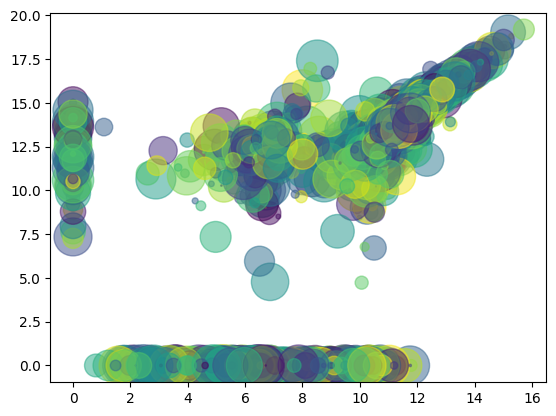

In [43]:
np.random.seed(2432532)

N = len(dist1.X[0])
#x = list(protein_meansP.keys())
x = [sum(dist1.X[:,i])/len(dist1.X[:,i]) for i in range(len(dist1.X[0]))]
#y = list(protein_meansR.keys())
y = [sum(dist2.X[:,i])/len(dist2.X[:,i]) for i in range(len(dist1.X[0]))]
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [44]:
protein_lists = sorted(protein_meansR.keys(), reverse=False)
protein_tests = {pval: protein_meansR[pval] for pval in protein_lists}
proteins = list(protein_tests.values())
proteins

['Q9Z2V5|HDAC6',
 'P07309|TTHY',
 'Q3UJU9|RMD3',
 'Q99KN9|EPN4',
 'Q00612|G6PD1',
 'Q8BSS9|LIPA2',
 'P97333|NRP1',
 'P12660|PCP2',
 'O88704|HCN1',
 'P28651|CAH8',
 'Q9JK42|PDK2',
 'Q80YX1|TENA',
 'Q61290|CAC1E',
 'P51655|GPC4',
 'Q8BR92|PALM2',
 'Q8K221|ARFP2',
 'Q9DBL1|ACDSB',
 'O55106|STRN',
 'Q9CQN3|TOM6',
 'P34914|HYES',
 'O55057|PDE6D',
 'P97355|SPSY',
 'Q8C460|ERI3',
 'Q505F5|LRC47',
 'Q62426|CYTB',
 'Q8R2Y0|ABHD6',
 'Q9EQ80|NIF3L',
 'Q8BWA8|ARHGJ',
 'Q8CHT1|NGEF',
 'Q8VHL1|SETD7',
 'O08663|MAP2',
 'Q03517|SCG2',
 'Q9CR98|F136A',
 'P62715|PP2AB',
 'P43275|H11',
 'Q80VC9|CAMP3',
 'P70699|LYAG',
 'O88587|COMT',
 'Q9QZB7|ARP10',
 'Q7TSH3|ZN516',
 'Q61387|COX7R',
 'Q8VE88|F1142',
 'Q91XT4|SC16B',
 'Q8BHW2|OSCP1',
 'Q8R1B5|CPLX3',
 'Q9CSU0|RPR1B',
 'Q8K4Z5|SF3A1',
 'Q8CDG3|VCIP1',
 'Q8VEH5|EPMIP',
 'Q5XG69|F169A',
 'Q8BTG3|T11L1',
 'O54988|SLK',
 'Q9D0R2|SYTC',
 'Q9DB73|NB5R1',
 'Q3UQ44|IQGA2',
 'Q99LG2|TNPO2',
 'Q8R404|MIC13',
 'Q5M8N4|D39U1',
 'Q91YU6|LZTS2',
 'Q9D8B7|JAM3',
 'Q91VC

In [45]:
protein_diffs = {}
for i in range(1729):
    protein_diffs[sum(dist1.X[:,i])/len(dist1.X[:,i]) - sum(dist2.X[:,i])/len(dist2.X[:,i])] = dist1.var.index[i]

print(max(protein_diffs))

11.787921667098999


In [46]:
protein_lists = sorted(protein_diffs.keys(), reverse=True)
protein_tests = {pval: protein_diffs[pval] for pval in protein_lists}
proteins = list(protein_tests.values())
proteins

['Q02105|C1QC',
 'P63040|CPLX1',
 'Q8BI08|MAL2',
 'O54901|OX2G',
 'P16045|LEG1',
 'P09528|FRIH',
 'O88448|KLC2',
 'Q4V9Z5|SE6L2',
 'P35279|RAB6A',
 'P56395|CYB5',
 'O70439|STX7',
 'P26040|EZRI',
 'P62317|SMD2',
 'P07310|KCRM',
 'Q61137|ASTN1',
 'O54734|OST48',
 'P29595|NEDD8',
 'Q3UUG6|TBC24',
 'Q8BFQ8|GALD1',
 'P97765|WBP2',
 'Q64487|PTPRD',
 'Q6GQS1|SCMC3',
 'O08583|THOC4',
 'Q01149|CO1A2',
 'P47746|CNR1',
 'Q63932|MP2K2',
 'Q3UV17|K22O',
 'Q60854|SPB6',
 'Q5RJI5|BRSK1',
 'Q5DU25|IQEC2',
 'P51660|DHB4',
 'P56387|DYLT3',
 'Q3UIU2|NDUB6',
 'P60521|GBRL2',
 'Q6A0A9|F120A',
 'P55258|RAB8A',
 'P97825|JUPI1',
 'Q5SUR0|PUR4',
 'Q01065|PDE1B',
 'P54923|ADPRH',
 'A2AQ25|SKT',
 'O88958|GNPI1',
 'P58404|STRN4',
 'Q6ZPU9|KBP',
 'Q80UJ7|RB3GP',
 'Q80Y17|L2GL1',
 'Q6ZPQ6|PITM2',
 'Q80TK0|K1107',
 'A2ASQ1|AGRIN',
 'Q8BH58|TIPRL',
 'Q3UHB8|CC177',
 'Q64518|AT2A3',
 'Q3UH66|WNK2',
 'Q60972|RBBP4',
 'Q3UH60|DIP2B',
 'Q7TPM6|FSD1',
 'Q3USB7|PLCL1',
 'P06797|CATL1',
 'P28798|GRN',
 'A2AN08|UBR4',
 'P588

In [47]:
proteins[:50]

['Q02105|C1QC',
 'P63040|CPLX1',
 'Q8BI08|MAL2',
 'O54901|OX2G',
 'P16045|LEG1',
 'P09528|FRIH',
 'O88448|KLC2',
 'Q4V9Z5|SE6L2',
 'P35279|RAB6A',
 'P56395|CYB5',
 'O70439|STX7',
 'P26040|EZRI',
 'P62317|SMD2',
 'P07310|KCRM',
 'Q61137|ASTN1',
 'O54734|OST48',
 'P29595|NEDD8',
 'Q3UUG6|TBC24',
 'Q8BFQ8|GALD1',
 'P97765|WBP2',
 'Q64487|PTPRD',
 'Q6GQS1|SCMC3',
 'O08583|THOC4',
 'Q01149|CO1A2',
 'P47746|CNR1',
 'Q63932|MP2K2',
 'Q3UV17|K22O',
 'Q60854|SPB6',
 'Q5RJI5|BRSK1',
 'Q5DU25|IQEC2',
 'P51660|DHB4',
 'P56387|DYLT3',
 'Q3UIU2|NDUB6',
 'P60521|GBRL2',
 'Q6A0A9|F120A',
 'P55258|RAB8A',
 'P97825|JUPI1',
 'Q5SUR0|PUR4',
 'Q01065|PDE1B',
 'P54923|ADPRH',
 'A2AQ25|SKT',
 'O88958|GNPI1',
 'P58404|STRN4',
 'Q6ZPU9|KBP',
 'Q80UJ7|RB3GP',
 'Q80Y17|L2GL1',
 'Q6ZPQ6|PITM2',
 'Q80TK0|K1107',
 'A2ASQ1|AGRIN',
 'Q8BH58|TIPRL']

In [48]:
protein_tests

{11.787921667098999: 'Q02105|C1QC',
 11.748292922973633: 'P63040|CPLX1',
 11.570525050163269: 'Q8BI08|MAL2',
 11.34775686264038: 'O54901|OX2G',
 11.240821361541748: 'P16045|LEG1',
 11.090915441513062: 'P09528|FRIH',
 11.067896008491516: 'O88448|KLC2',
 11.047662258148193: 'Q4V9Z5|SE6L2',
 11.001646041870117: 'P35279|RAB6A',
 10.978491425514221: 'P56395|CYB5',
 10.929310917854309: 'O70439|STX7',
 10.85146963596344: 'P26040|EZRI',
 10.811399817466736: 'P62317|SMD2',
 10.802726149559021: 'P07310|KCRM',
 10.780531644821167: 'Q61137|ASTN1',
 10.77429485321045: 'O54734|OST48',
 10.676857471466064: 'P29595|NEDD8',
 10.671235084533691: 'Q3UUG6|TBC24',
 10.668395161628723: 'Q8BFQ8|GALD1',
 10.664379835128784: 'P97765|WBP2',
 10.631312012672424: 'Q64487|PTPRD',
 10.62805962562561: 'Q6GQS1|SCMC3',
 10.617859721183777: 'O08583|THOC4',
 10.605722188949585: 'Q01149|CO1A2',
 10.592074632644653: 'P47746|CNR1',
 10.562766075134277: 'Q63932|MP2K2',
 10.536210179328918: 'Q3UV17|K22O',
 10.534494519233704

In [49]:
protein_lists = sorted(protein_diffs.keys(), reverse=True)
protein_tests = {pval: protein_diffs[pval] for pval in protein_lists}
proteins = list(protein_tests.keys())
proteins

[11.787921667098999,
 11.748292922973633,
 11.570525050163269,
 11.34775686264038,
 11.240821361541748,
 11.090915441513062,
 11.067896008491516,
 11.047662258148193,
 11.001646041870117,
 10.978491425514221,
 10.929310917854309,
 10.85146963596344,
 10.811399817466736,
 10.802726149559021,
 10.780531644821167,
 10.77429485321045,
 10.676857471466064,
 10.671235084533691,
 10.668395161628723,
 10.664379835128784,
 10.631312012672424,
 10.62805962562561,
 10.617859721183777,
 10.605722188949585,
 10.592074632644653,
 10.562766075134277,
 10.536210179328918,
 10.534494519233704,
 10.521515488624573,
 10.516549825668335,
 10.494117498397827,
 10.491344809532166,
 10.471828937530518,
 10.427106976509094,
 10.425452470779419,
 10.41663110256195,
 10.404858469963074,
 10.393908858299255,
 10.385725975036621,
 10.372612595558167,
 10.336094379425049,
 10.3323894739151,
 10.323505520820618,
 10.318031072616577,
 10.27604067325592,
 10.260767936706543,
 10.248784065246582,
 10.239254236221313,


In [50]:
means = pd.DataFrame(list(zip(x, y)), columns=['Predicted', 'Actual'])
means.head()

,Predicted,Actual
0,9.850904,12.507708
1,6.070535,0.000000
2,10.628424,12.609104
3,6.286087,0.000000
4,0.000000,12.680056


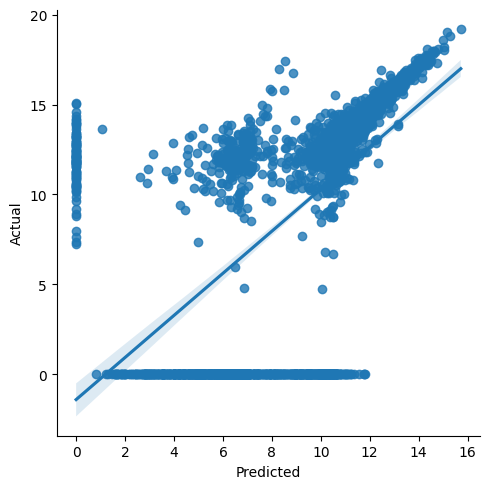

In [51]:
import seaborn as sb

sb.lmplot(x='Predicted', y='Actual', data=means)

In [52]:
from scipy import stats

stats.pearsonr(x, y)

(0.5988866743240114, 1.5790647010675048e-288)

In [53]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.8362946685933832, pvalue=0.0)